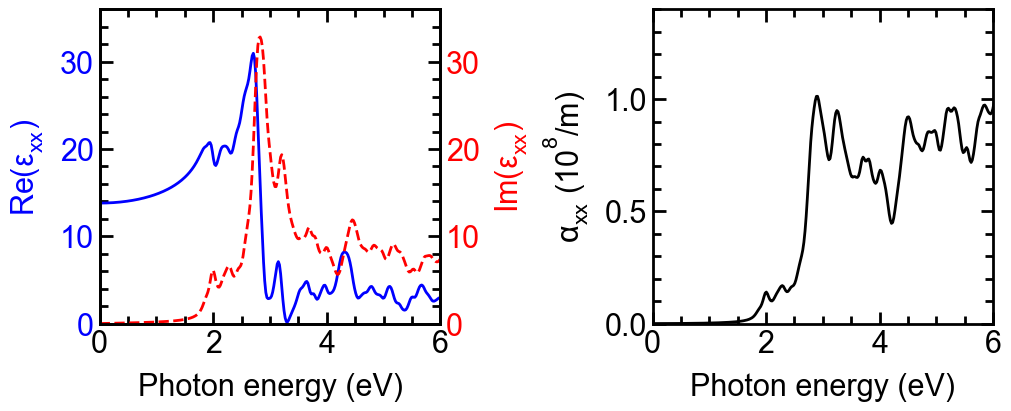

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../../matplotlib/sci.mplstyle')
import numpy as np

# Set parameter
c = 299792458 # velocity of light (m/s)
hbar = 6.582119569e-16 # reduced Planck constant (eV.s)
l = 2.0/0.65 # Reduce thinkness the unit cell (2nm) to real thickness (0.65 nm)

# Open and read the real part of dielectric tensor diagonal components
ener, repsx, repsy, repsz = np.loadtxt('epsr_mos2.dat', unpack=True)
# Open and read the imaginary part of dielectric tensor diagonal components
ener, iepsx, iepsy, iepsz = np.loadtxt('epsi_mos2.dat', unpack=True)

# Absorption coefficient in x-, y-, z-directions
alphax = 2*(ener/hbar)*np.sqrt((np.sqrt((l*repsx)**2+(l*iepsx)**2)-l*repsx)/2)/c
alphay = 2*(ener/hbar)*np.sqrt((np.sqrt((l*repsy)**2+(l*iepsy)**2)-l*repsy)/2)/c
alphaz = 2*(ener/hbar)*np.sqrt((np.sqrt((l*repsz)**2+(l*iepsz)**2)-l*repsz)/2)/c

# Create figure object
fig, (ax1, ax3) = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 4))
ax2 = ax1.twinx()
# Plot the epsilon
ax1.plot(ener, l*repsx, 'b-')
ax2.plot(ener, l*iepsx, 'r--')
# Add the x and y-axis labels
ax1.set_xlabel('Photon energy (eV)')
ax1.set_ylabel(r'Re$(\varepsilon_{xx})$', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax2.set_ylabel(r'Im$(\varepsilon_{xx})$', color='r')
ax2.tick_params(axis='y', labelcolor='r')
# Set the axis limits
ax1.set_xlim(0, 6)
ax1.set_ylim(0, 36)
ax2.set_ylim(0, 36)

# Plot the abosorption coefficient
ax3.plot(ener, alphax/10**8, c='k')
# Add the x and y-axis labels
ax3.set_xlabel('Photon energy (eV)')
ax3.set_ylabel(r'$\alpha_{xx}$ (10$^8$/m)')
# Set the axis limits
ax3.set_xlim(0, 6)
ax3.set_ylim(0, 1.4)

# Save a figure to the pdf file
plt.savefig('plot-optic.pdf')
plt.show()